In [1]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit.library import QFT
from numpy import pi
from qiskit.quantum_info import Statevector
from matplotlib import pyplot as plt
import numpy as np

provider = IBMQ.load_account()

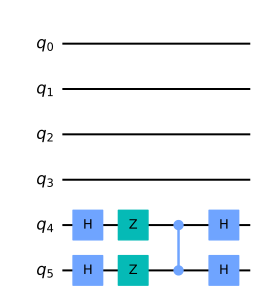

In [21]:
one_step_circuit = QuantumCircuit(6, name=' ONE STEP') 
# Coin operator
one_step_circuit.h([4,5])
one_step_circuit.z([4,5])
one_step_circuit.cz(4,5)
one_step_circuit.h([4,5])
one_step_circuit.draw() 

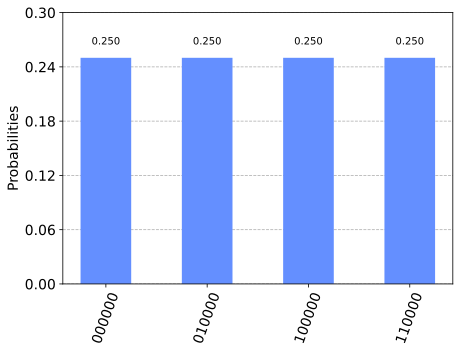

In [23]:
one_sim = one_step_circuit.copy()
one_sim.save_statevector()

sim = Aer.get_backend('aer_simulator')
qobj = assemble(one_sim)
result = sim.run(qobj).result()

from qiskit_textbook.tools import vector2latex
#vector2latex(result.get_statevector(), pretext="|\\psi\\rangle =")
plot_histogram(result.get_counts())

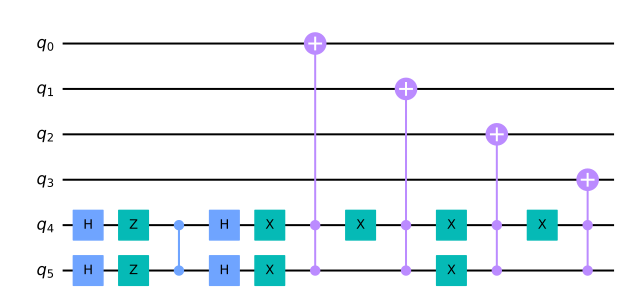

In [15]:
# Shift operator function for 4d-hypercube
def shift_operator(circuit):
    for i in range(0,4):
        circuit.x(4)
        if i%2==0:
            circuit.x(5)
        circuit.ccx(4,5,i)

shift_operator(one_step_circuit)

one_step_gate = one_step_circuit.to_instruction() 
one_step_circuit.draw() 